## Import required libraries

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [104]:
df = pd.read_csv('/content/Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


# ABOUT
The file Books_Data_Clean.csv contains comprehensive information on book sales, ratings, and genres, including publishing year, author details, ratings, sales performance data, and genre classification

* Publishing Year: The year in which the book was published. (Numeric)
* Book Name: The title of the book. (Text)
* Author: The name of the author of the book. (Text)
* language_code: The code representing the language in which the book is written. (Text)
* Author_Rating: The rating of the author based on their previous works. (Numeric)
* Book_average_rating: The average rating given to the book by readers. (Numeric)
* Book_ratings_count: The number of ratings given to the book by readers. (Numeric)
* genre: The genre or category to which the book belongs. (Text)
* gross sales: The total sales revenue generated by a specific book. (Numeric)
* publisher revenue: The revenue earned by a publisher from selling a specific book. (Numeric)
* sale price: The price at which a specific book was sold. (Numeric)
* sales rank: The rank of a particular book based on its sale performance. (Numeric)
* units sold: The number of units sold for any particular book. (Numeric)

In [105]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


## Observation:
### we can clearly see that from year 2010 - 2016, there is a huge jump in-
* Book_ratings_count
* gross sales
* publisher revenue
* sale price
* units sold

# ISSUES
## 1. negative values in publishing year col

In [106]:
df['Publishing Year'].sort_values().head(10)

# we've 6 negative values, also practically we need data from 1900 year, not before that

,Publishing Year
589,-560.0
990,-441.0
293,-430.0
241,-380.0
568,-300.0
749,-17.0
636,1308.0
446,1320.0
115,1390.0
242,1593.0


In [107]:
df = df[df['Publishing Year'] >= 1900]

In [108]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [109]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


## 2. there are null values in book name and language code cols
* since we don't have 21 books name, so we'll drop them
* removing 49 rows with nan language code may remove some important data, so leave it as it is

In [110]:
df.dropna(subset = "Book Name", inplace=True)

In [111]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,47
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


##3. There are 988 rows now, in which unique book names are 987, meaning there is one duplicated book name

In [114]:
df[df['Book Name'].duplicated()]['Book Name']

,Book Name
933,Persepolis


In [115]:
df[df['Book Name'] == 'Persepolis']

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
297,297,2000.0,Persepolis,"Marjane Satrapi, Mattias Ripa",eng,Excellent,4.23,117103,genre fiction,1487.02,892.212,4.99,321,Random House LLC,298
933,933,2003.0,Persepolis,"Marjane Satrapi, Mattias Ripa, Blake Ferris, A...",en-US,Excellent,4.36,71353,nonfiction,108.90,0.000,0.99,1099,"Amazon Digital Services, Inc.",4320


## Clearly, the second row is illogical, because:
* there is zero publisher revenue, sale price and still there are 4320 units sold.
* so drop this row

In [116]:
df.drop(933, inplace = True)

In [117]:
df.nunique()

,0
index,987
Publishing Year,101
Book Name,987
Author,668
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,982
genre,4
gross sales,774


In [118]:
df['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

##4. Since 'genre fiction' and 'fiction' is the same thing, so replace it.

In [119]:
df['genre'] = df['genre'].replace('genre fiction','fiction')

In [120]:
df['genre'].unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

In [121]:
df.nunique()

,0
index,987
Publishing Year,101
Book Name,987
Author,668
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,982
genre,3
gross sales,774


In [122]:
lang_count = df['language_code'].value_counts()
lang_count

,count
language_code,
eng,670
en-US,225
en-GB,29
en-CA,7
fre,4
spa,2
ara,2
nl,1


## 5. We can clearly see that there are 4 variants of english and other 4 languages can come in other category. So, its better to have just 2 categories



In [123]:
df['language_code'] = df['language_code'].replace(['eng','en-US','en-GB','en-CA'], 'english')
df['language_code'] = df['language_code'].replace(['fre','spa','ara','nl'], 'other')

In [124]:
df['language_code'].value_counts()

,count
language_code,
english,931
other,9


# Visual Exploration of Data




Text(0.5, 1.0, 'No. of books published over years')

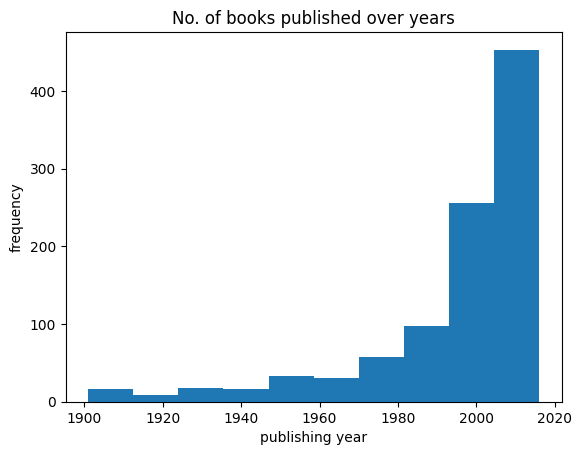

In [125]:
plt.hist(df['Publishing Year'])
plt.xlabel("publishing year")
plt.ylabel("frequency")
plt.title("No. of books published over years")

## 1. Books sales has increased with time

In [126]:
# max year
df['Publishing Year'].max()

2016.0

Text(0.5, 1.0, 'No. of books in each genre')

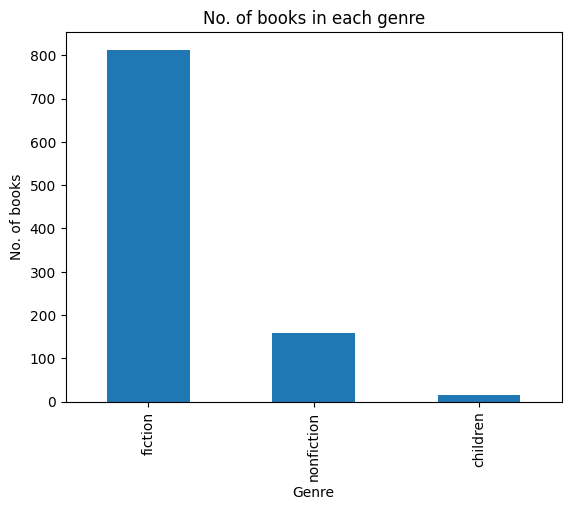

In [127]:
df['genre'].value_counts().plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("No. of books")
plt.title("No. of books in each genre")

## 2. Maximum books are of 'fiction' genre

<Axes: ylabel='Frequency'>

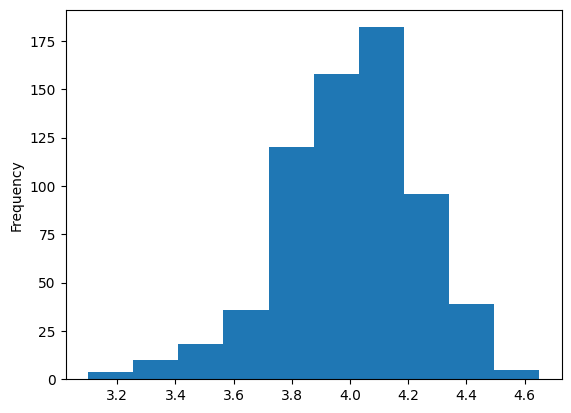

In [128]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False).plot(kind='hist')

## 3. Maximum no. of authors have got rating of around 4 and it gradually decreased, meaning authors with 4.5+ rating are less

In [129]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False).head(1)

,Book_average_rating
Author,
Bill Watterson,4.65


##Bill Watterson has got maximum rating of 4.6

Text(0.5, 1.0, 'Box plot of books ratings count for each genre')

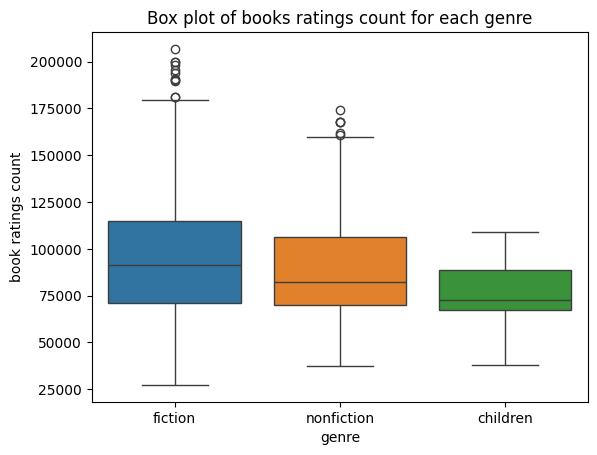

In [130]:
sns.boxplot(data=df, x='genre', y='Book_ratings_count', hue='genre')
plt.xlabel("genre")
plt.ylabel("book ratings count")
plt.title("Box plot of books ratings count for each genre")
# df.head()

## 4. Maximum ratings are given to fiction, which is obvious because fiction genre has maximum no. of books, then non fiction and then children

<Axes: xlabel='Publishing Year', ylabel='units sold'>

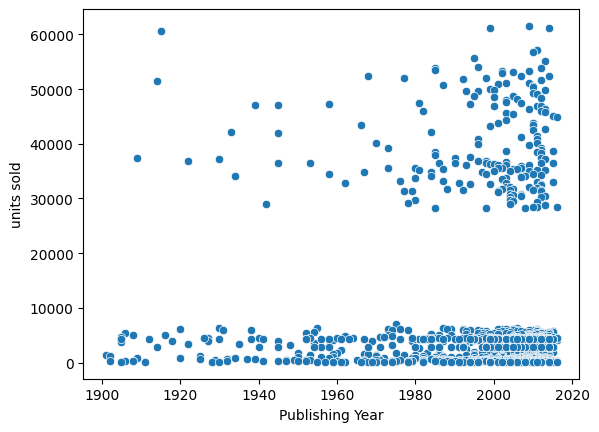

In [131]:
# df['units sold'].plot(kind='hist')
sns.scatterplot(data=df, x='Publishing Year', y='units sold')

## 5. this concludes that either books were sold really well(above 25000) or didn't sell much at all(below 8000)

Text(1012.4490740740741, 0.5, 'units sold')

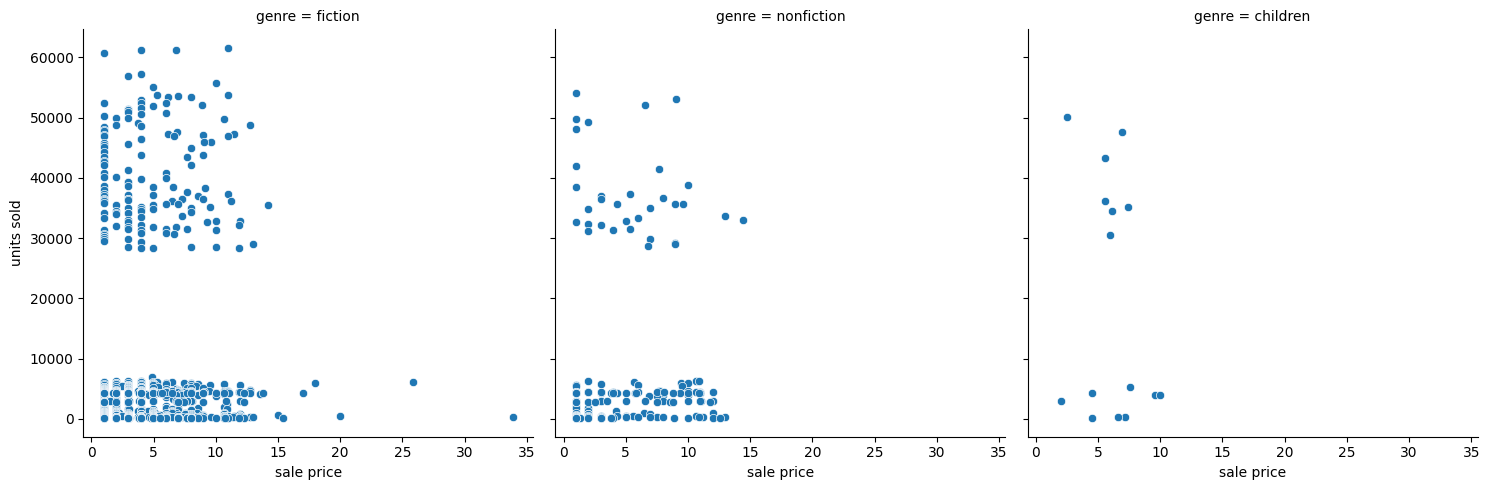

In [132]:
sns.relplot(data=df, x='sale price', y='units sold', kind = 'scatter',col='genre')
plt.xlabel("sale price")
plt.ylabel("units sold")

## 6.
## -> many high selling books are still low priced
## -> fiction and non fiction books show similar behaviour with more no. of books in fiction
## -> children books were sold very few

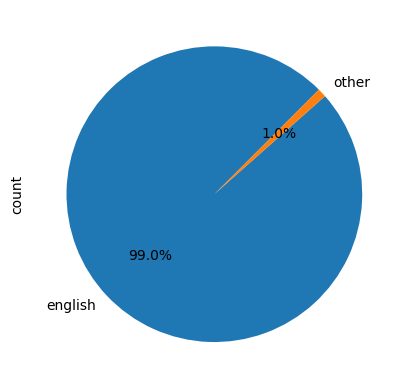

In [142]:
df['language_code'].value_counts().plot(kind='pie', autopct = '%0.1f%%', startangle = 45)
plt.show()

## 7. 99% books are of english language and only 1% are of other

In [148]:
publisher_data = df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending=False)
publisher_data

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


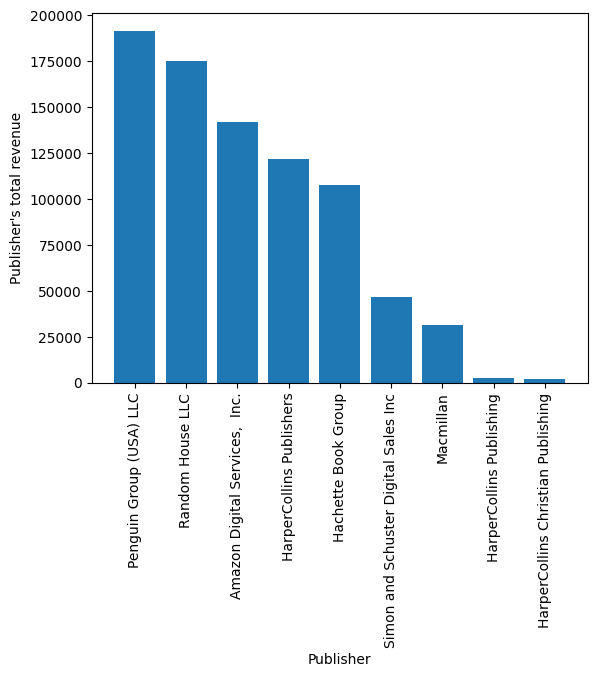

In [149]:
plt.bar(publisher_data.index, publisher_data.values)
plt.xlabel("Publisher")
plt.ylabel("Publisher's total revenue")
plt.xticks(rotation=90)
plt.show()

## 8. Penguin Group made the most revenue and HCCP the least

In [152]:
df.groupby('Publisher ')['units sold'].sum().sort_values(ascending=False)

,units sold
Publisher,
"Amazon Digital Services, Inc.",5703429
Random House LLC,1257293
Penguin Group (USA) LLC,848160
HarperCollins Publishers,535959
Hachette Book Group,520554
Simon and Schuster Digital Sales Inc,497648
Macmillan,292053
HarperCollins Publishing,44358
HarperCollins Christian Publishing,41527


<Axes: xlabel='Publisher '>

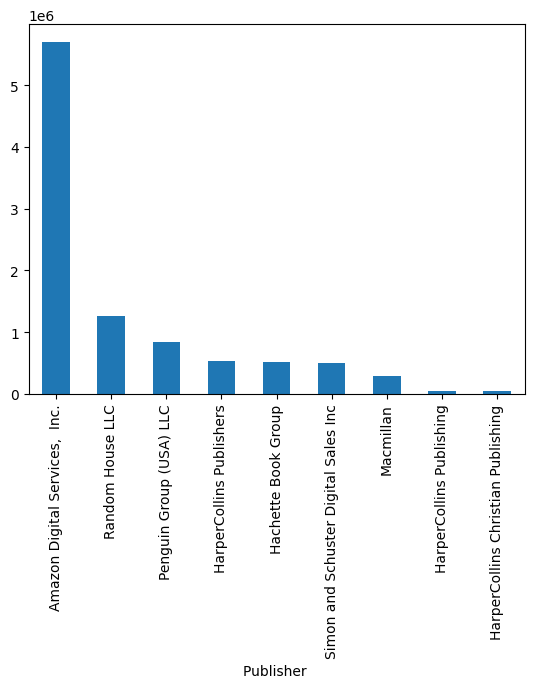

In [153]:
df.groupby('Publisher ')['units sold'].sum().sort_values(ascending=False).plot(kind = 'bar')

##9. Amazon Digital Services sold around 5.7 Million units, then other publishers sold below 1.2 Million, and this is the main reason why we saw a gap in units sold, it is because of Publisher

In [154]:
book_rating = df.groupby("Author_Rating")['Book_ratings_count'].mean().sort_values(ascending=False)
book_rating

,Book_ratings_count
Author_Rating,
Intermediate,101400.272569
Famous,98295.250000
Novice,87318.464286
Excellent,83841.970149


<BarContainer object of 4 artists>

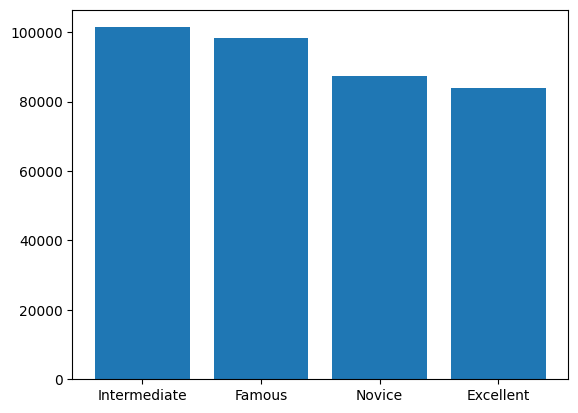

In [155]:
plt.bar(book_rating.index, book_rating.values)

## 10. maximum rating given by people is 'intermediate'

In [158]:
df.groupby("Author_Rating")['Book_ratings_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Author_Rating,,,,,,,,
Excellent,335.0,83841.970149,21043.845092,32626.0,68849.50,81621.0,97507.50,167848.0
Famous,48.0,98295.250000,35036.475144,54977.0,72968.25,90527.0,113070.50,206792.0
Intermediate,576.0,101400.272569,34210.096082,27308.0,72933.50,98254.5,125439.25,199872.0
Novice,28.0,87318.464286,30859.612389,42339.0,63638.25,77446.5,105349.25,155903.0


Text(0, 0.5, 'rating count')

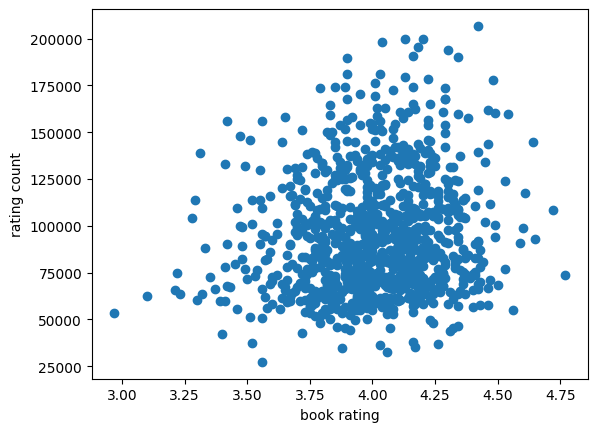

In [ ]:
plt.scatter(df['Book_average_rating'], df['Book_ratings_count'])
plt.xlabel("book rating")
plt.ylabel("rating count")

## 11. Most books with a rating of around 4 have been rated by 50,000 to 100,000 people, with some outliers going higher.

In [165]:
author_sales = df.groupby('Author')['gross sales'].sum().sort_values(ascending=False)
author_sales

,gross sales
Author,
Harper Lee,47795.00
Stephen King,43322.65
David Sedaris,42323.41
Charlaine Harris,39453.08
Laini Taylor,38278.41
...,...
"Guillermo del Toro, Chuck Hogan",107.91
Ayaan Hirsi Ali,107.91
Walter M. Miller Jr.,106.92


Text(0, 0.5, 'total gross sales')

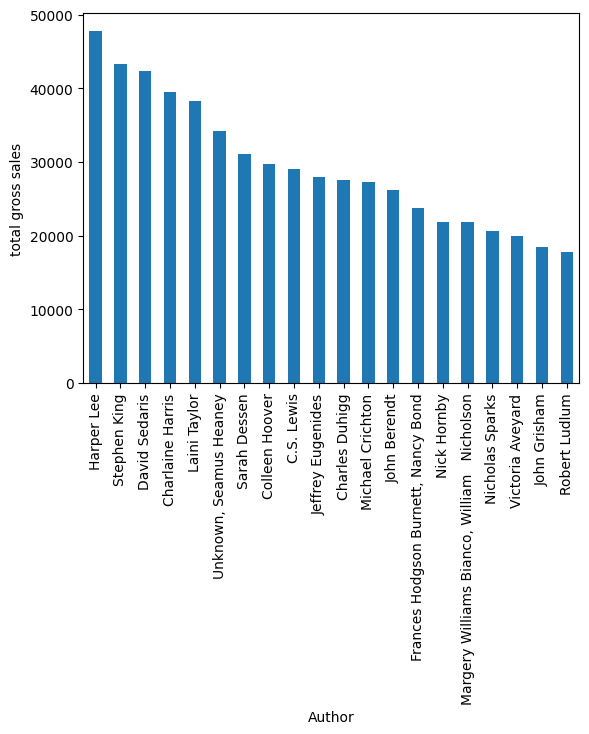

In [166]:
author_sales = df.groupby('Author')['gross sales'].sum().sort_values(ascending=False)
author_sales.head(20).plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("total gross sales")

## 12. max gross sale is of Harper Lee

In [167]:
df.groupby("Author_Rating")["units sold"].sum().sort_values(ascending=False)

,units sold
Author_Rating,
Intermediate,4726167
Excellent,4466354
Famous,336772
Novice,211688


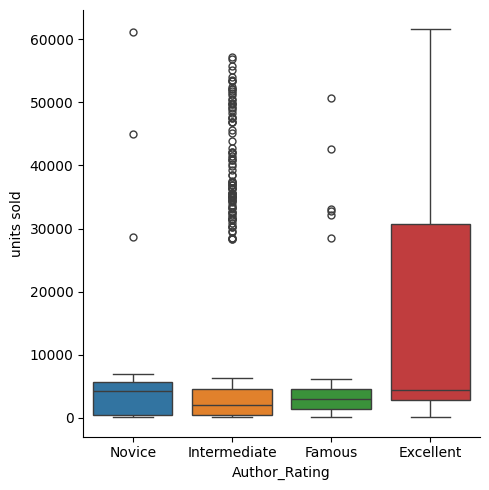

In [168]:
sns.catplot(data=df, x='Author_Rating', y='units sold', kind = 'box', hue='Author_Rating')

## 13. Maximum books were sold of Author with 'excellent' as rating

Text(0.5, 1.0, 'Total units sold over the years')

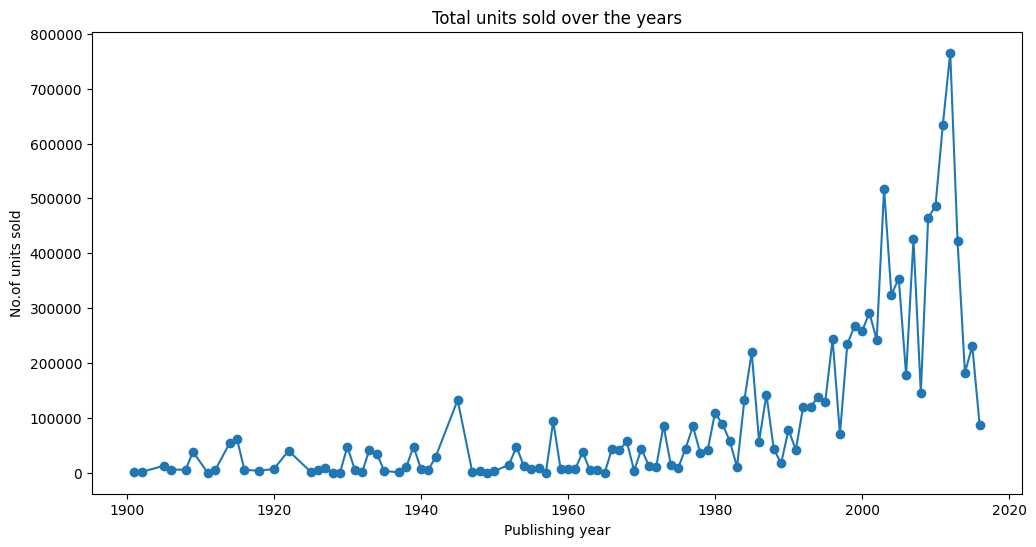

In [169]:
plt.figure(figsize=(12,6))
df.groupby('Publishing Year')['units sold'].sum().plot(kind = 'line', marker = 'o')
plt.xlabel("Publishing year")
plt.ylabel("No.of units sold")
plt.title("Total units sold over the years")

In [170]:
df['Publishing Year'].nunique()

101

In [171]:
df.groupby('genre')['units sold'].sum().sort_values(ascending=False)

,units sold
genre,
fiction,7876524
nonfiction,1566339
children,298118


In [172]:
df['genre'].unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

In [173]:
gen_f = df[df['genre'] == 'fiction']
gen_nf = df[df['genre'] == 'nonfiction']
gen_c = df[df['genre'] == 'children']

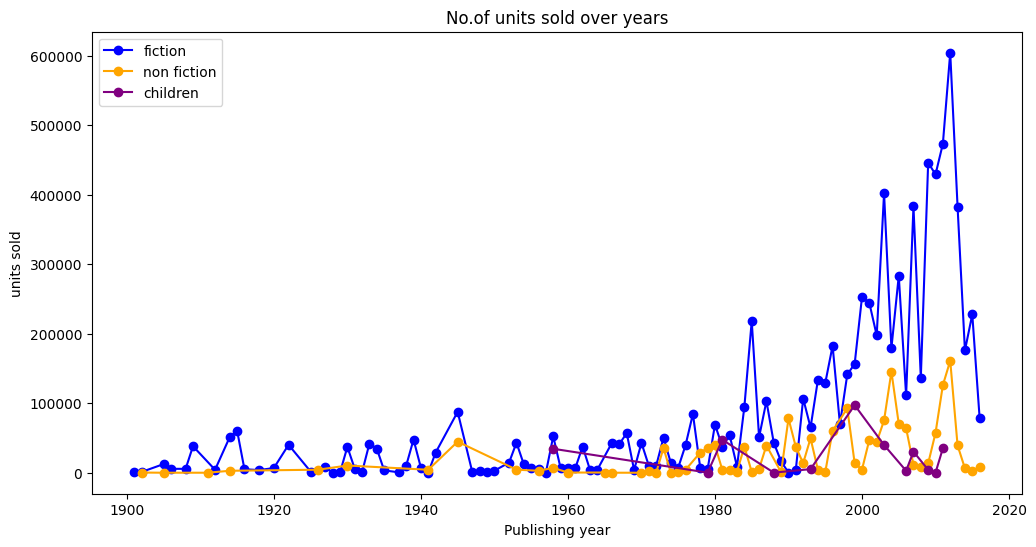

In [177]:
plt.figure(figsize = (12,6))

gen_f.groupby("Publishing Year")['units sold'].sum().plot(kind = 'line', marker = 'o', color = 'blue', label='fiction')
gen_nf.groupby("Publishing Year")['units sold'].sum().plot(kind = 'line', marker = 'o', color = 'orange', label='non fiction')
gen_c.groupby("Publishing Year")['units sold'].sum().plot(kind = 'line', marker = 'o', color = 'purple', label='children')

plt.xlabel("Publishing year")
plt.ylabel("units sold")
plt.title("No.of units sold over years")

plt.legend()

## 14. Above is a line plot for all 4 genres displaying about units sold over years

# FINAL CONCLUSION

##"Fiction books in the English language, especially those published by Amazon and Penguin, dominate the market in terms of quantity, ratings, and units sold — revealing a strong reader preference and industry focus over time."